In [127]:
import numpy as np
from matplotlib import pyplot as plt
import DeeperDream as dd

In [128]:
def rec_sum(l):
    if l:
        return l[0] + rec_sum(l[1:])
    else:
        return 0

In [129]:
l=[2,3,4]
rec_sum(l)

9

In [130]:
def gini(y):
    classes = set(y)
    N = len(y)
    N_classes = [sum([val == c for val in y]) for c in classes]
    return sum([n / N * (1 - n / N) for n in N_classes]) 

In [131]:
gini([0,0,1,2,3,3])

0.7222222222222222

In [132]:
def gini(y):
    N = y.shape[0]
    classes,counts = np.unique(y, return_counts=True)
    p = counts / N
    return np.sum(p * (1 - p))

In [133]:
gini(np.array([0,0,1,2,3,3]))

0.7222222222222222

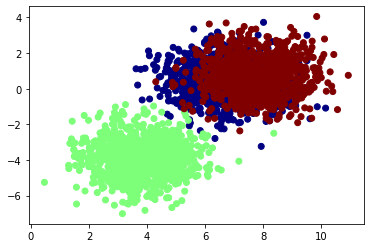

In [134]:
x,y = dd.Toy.Clusters(1000, 3, 2, 4)
y = np.array(np.argmax(y, axis=1),ndmin=2).T
plt.scatter(x[:,[0]],x[:,[1]],c=y,cmap='jet')

In [135]:
def InfoGain(y,mask):
    N = y.shape[0]
    N_l = np.sum(~mask)
    N_r = np.sum(mask)
    return gini(y) - (N_l*gini(y[~mask]) + N_r * gini(y[mask])) / N

In [136]:
gain = []
thresh = np.linspace(x[:,0].min(), x[:,0].max())
for t in thresh:
    mask = x[:,0] > t
    gain.append(InfoGain(y,mask))

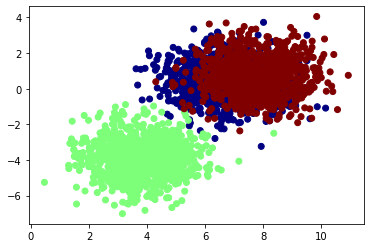

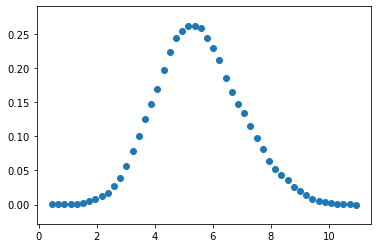

In [145]:
plt.scatter(x[:,[0]],x[:,[1]],c=y,cmap='jet')
plt.show()
plt.scatter(thresh,gain)

In [146]:
class Tree:
    def __init__(self):
        self.root = Node()
        
    def Fit(self, x, y, max_dep=1, min_pts=1, min_gin=1e-3, min_ig=1e-3, num=50):
        self.MakeSplits(x,y,self.root,max_dep,min_pts,min_gin,min_ig,num)
        
    def predict(self,x):
        out = np.zeros((x.shape[0],1))
        for i,e in enumerate(x):
            out[i] += self.root.predict(e)
        return out
           
    def MakeSplits(self,x, y, node, max_dep=1, min_pts=1, min_gin=1e-3, min_ig=1e-3, num=50):
        if max_dep > 0 and min_pts < x.shape[0]:
            best_feat = -1
            best_thresh = None
            best_mask = None
            best_gain = 0
            for i,feat in enumerate(x.T):
                for t in np.linspace(feat.min(), feat.max(),num=num):
                    mask = feat > t
                    gain = InfoGain(y,mask)
                    if gain > best_gain:
                        best_feat = i
                        best_thresh = t
                        best_mask = mask
                        best_gain = gain

            node.feat = best_feat
            node.thresh = best_thresh
            node.l = Node(node)
            node.r = Node(node)
            
            if best_gain > min_ig:
                if min_gin < gini(y[~best_mask]):
                    self.MakeSplits(x[~best_mask],y[~best_mask],node.l,max_dep-1,min_pts,min_gin,min_ig,num)
                else:
                    cats,counts = np.unique(y[~best_mask],return_counts=True)
                    node.l.val = cats[np.argmax(counts)]
                    node.l.term = True
                if min_gin < gini(y[best_mask]):
                    self.MakeSplits(x[best_mask],y[best_mask],node.r,max_dep-1,min_pts,min_gin,min_ig,num)
                else:
                    cats,counts = np.unique(y[best_mask],return_counts=True)
                    node.r.val = cats[np.argmax(counts)]
                    node.r.term = True
            else:
                cats,counts = np.unique(y,return_counts=True)
                node.val = cats[np.argmax(counts)]
                node.term = True
        else:
            cats,counts = np.unique(y,return_counts=True)
            node.val = cats[np.argmax(counts)]
            node.term = True    
        
class Node:
    def __init__(self, p=None,l=None,r=None,val=None,feat=None,thresh=None,term=False):
        self.p = p
        self.l = l
        self.r = r
        self.val=val
        self.feat = feat
        self.thresh = thresh
        self.term = term

    def predict(self,x):
        if self.term:
            return self.val
        else:
            if x[self.feat] > self.thresh:
                return self.r.predict(x)
            else:
                return self.l.predict(x)

In [147]:
tree = Tree()
x_test = np.array([[1,1],[1,2],[1,3]],ndmin=2)
y_test = np.array([1,0,1],ndmin=2).T
tree.Fit(x_test,y_test,max_dep=2)

In [148]:
tree.predict(x_test)

array([[1.],
       [0.],
       [1.]])

In [154]:
tree = Tree()
tree.Fit(x,y,max_dep=20)

In [155]:
y_pred = tree.predict(x)
y_pred.shape

(3000, 1)

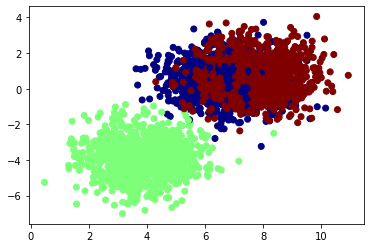

In [156]:
plt.scatter(x[:,0],x[:,1],c=y_pred[:,0],cmap='jet')

[0.95333333]


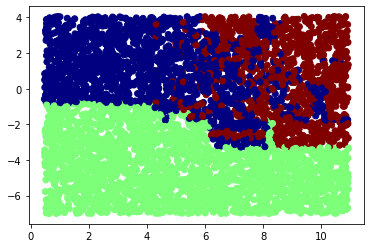

In [157]:
acc = np.sum(np.equal(y,y_pred),axis=0) / y.shape[0]
print(acc)
x_line_0 = np.random.rand(5000,1) * (x[:,0].max() - x[:,0].min()) + x[:,0].min()
x_line_1 = np.random.rand(5000,1) * (x[:,1].max() - x[:,1].min()) + x[:,1].min()
x_line = np.hstack((x_line_0,x_line_1))
y_line = tree.predict(x_line)
plt.scatter(x_line[:,[0]], x_line[:,[1]], c=y_line,cmap='jet')

In [169]:
a = [[1],[2],[3]]
b = [[1],[2],[3]]
s = []
s.extend(a[1:2] + b[1:2])
s

[[2], [2]]